# Reinforcement Learning through the lens of Optimisation. Bandits.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eleni-vasilaki/rl-notes/blob/main/notebooks/04_bandits.ipynb)

### Optimisation and Decision Making  

Imagine how you make choices in your life. Implicit in your choices, there is some form of optimisation.  

For instance, you try, when possible, to go to the university of your choice, selecting a topic of study that you believe will be most beneficial—perhaps because of career opportunities, personal interest, financial stability, or social connections. Often, it is a combination of these factors. Different things matter to different people, but in the end, you are **implicitly optimising** your life.  

Maybe you didn’t want to overthink everything, so you left part of the decision to chance. That means you optimised for something else—your energy, your well-being, your time. You chose to focus on something you value more, and you let luck determine the rest. That, too, is an implicit **optimisation**—choosing where to direct your effort.  

Now, think about how you make choices in friendships. On this planet, there may be a person who could be your best friend, someone whose personality and experiences align with yours in ways you haven’t yet discovered. But you may never meet them. The best friends you will ever have might still be strangers to you at this moment. I can certainly tell you that, at your age, I had not yet met the best friends I would ever have.  

Or take romantic relationships, if that interests you. Even here, you are optimising something. Not everyone is optimising for the same thing—some people prioritise shared interests, others stability, others excitement. But almost everyone **optimises locally**.  

Let’s take dating or friendship as an example. Even if you search for connections online, thinking that you are broadening your options, your **search is still local**—it is constrained to the population that uses that particular platform, social media, or social environment you have chosen to engage with.  

While some people may feel they are making the **optimal** choices for their lives, in reality, our choices are wildly different because different things mean different benefits to each of us. And often, we make decisions under constraints. But one thing remains true: optimisation is at the heart of how we make choices.  

Today, we are going to talk more about **gradient descent**, a popular optimisation method that looks for an optimal local solution. We will look at reinforcement learning within this framework—where what we are trying to optimise is **reward**. We will start with defining a system by a function of multiple parameters, which we want to maximise or minimise, and discuss how to do so using the concept of gradient.

## Introduction to Gradient Descent

Consider a system described mathematically by a function $f(x_1, x_2,\ldots, x_n)$. Such a function is known as **multivariable** because it accepts multiple variables as inputs simultaneously. A more compact way to describe it is by $f(\mathbf{x})$, where $\mathbf{x}=[x_1~x_2~x_3 \ldots]^T$ is a vector representing the parameters of the system. $T$ here is the operator "transposed," meaning rows become columns (and vice versa), as in mathematics, vectors are typically considered column vectors.

The goal of optimisation is to find the values of $\mathbf{x}$ that either minimise or maximise $f(\mathbf{x})$, depending on whether $f(\mathbf{x})$ is a measure of error or performance. When the function has a single extremum, it is possible to find its minimum or maximum through analytical methods. For a given function $f(\mathbf{x})$, direct minimisation involves calculating the values of $\mathbf{x}$ that lead to the lowest value of $f$.

More specifically, given a function $f(\mathbf{x})$ with a convex form, such as $f(\mathbf{x})=x_1^2+x_2^2$, we can take the partial derivative of $f$ with respect to each parameter $x_i$ in $\mathbf{x}$ and set it to zero:

$$ \frac{\partial f}{\partial x_i} = 0 $$

This condition suggests that the slope of the function with respect to any direction in the parameter space is zero. A convex function has a unique minimum, making it easier to identify.

However, for more complex systems, finding parameters that minimise the error function by simply setting the derivative to zero is generally not effective. Complex systems often have multiple local minima (or maxima) and complex interdependencies between parameters. To circumvent this issue, we use a method called **gradient descent**. Starting from an initial point, we estimate the gradient of the error function and take a small step in the opposite direction of this gradient. This is because the gradient of a function at any point gives us the direction of the steepest ascent.

By moving in the opposite direction, we iteratively move towards the steepest descent and thus towards a local minimum of the function. This technique is foundational to machine learning and many other optimisation algorithms. The process can be mathematically represented as:

$$ \mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f(\mathbf{x}), $$

where $\mathbf{x}_{i}$ is the current value of $\mathbf{x}$, $\mathbf{x}_{i+1}$ is the new value, $i$ is an index typically starting from $0$, which corresponds to the initial point, $\eta$ is the learning rate, and $\nabla f(\mathbf{x})$ is the gradient of the function at $\mathbf{x}$. The learning rate $\eta$ controls the size of the steps we take towards the minimum. The gradient $\nabla f(\mathbf{x})$ is given by:

$$\nabla f(\mathbf{x}) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ldots, \frac{\partial f}{\partial x_n} \right]$$

which contains information about the partial derivatives of the function.

Traditionally, gradients are expressed as **column vectors** in mathematics and deep learning literature. However, tools like PyTorch store gradients as row vectors. It is important to choose a convention and use it consistently throughout calculations and implementations. 

The **update rule** is typically written as:

$$  \Delta \mathbf{x} = - \eta \nabla f(\mathbf{x}), $$

where it is implied that $ \Delta $ denotes the difference between two subsequent values, corresponding to the definition of the derivative:

$$ \Delta \mathbf{x} = \mathbf{x}_{i+1} -  \mathbf{x}_{i}.$$


### **Example**

Consider the quadratic function $f(x) = ax^2 + bx + c$, where $a$, $b$, and $c$ are constants, and $a>0$. Our objective is to find its local minimum. 

First, we compute the derivative of $f(x)$ with respect to $x$ to identify the slope of the function at any point $x$:

$$f'(x) = \frac{d}{dx}(ax^2 + bx + c) = 2ax + b.$$

Setting the derivative equal to zero gives us the condition for the critical points where the function's slope is zero:

$$ 2ax + b = 0 $$

Solving for $x$ gives us the $x$-value at the critical point:

$$x = -\frac{b}{2a}.$$ 

Since there is a unique solution, there must be one extremum.

The critical point $x = -\frac{b}{2a}$ is where the function $f(x)$ reaches its local minimum, provided that $a > 0$. To verify this, we compute the second derivative:

$$ f''(x) = 2a. $$

Since this value is positive when $a > 0$, a small perturbation in $x$ will result in higher function values, confirming that the critical point corresponds to the lowest local value.

Because $f(x)$ is a convex function, and convex functions have a single extremum that is guaranteed to be global, the local minimum is also the global minimum.

To apply gradient descent to this function, we start with an initial guess $x_0$ and iteratively apply the update rule:

$$x_{i+1} = x_{i} - \eta (2ax_i + b),$$

where $\eta$ is the learning rate, a small positive number that controls the size of each step. By iteratively updating $x$ using this rule, we move towards the minimum value of $f(x)$.

The gradient descent algorithm will converge to the value $x = -\frac{b}{2a}$, the function's local minimum, given an appropriate $\eta$ and starting point $x_0$.

### **Definition of Convexity**
A convex function is a type of function where the line segment between any two points on the graph of the function lies above or on the graph. Formally, a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is convex if for all $x, y \in \mathbb{R}^n$ and for all $\theta$ in the range $[0,1]$, the following inequality holds:

$$f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta)f(y).$$

This means that for any two points in the domain of $f$, the function's value along the line segment between them does not exceed the interpolated values of $f$. In optimisation, convexity is crucial because it guarantees that any local minimum is also a global minimum, ensuring that gradient descent reliably finds the best possible solution.

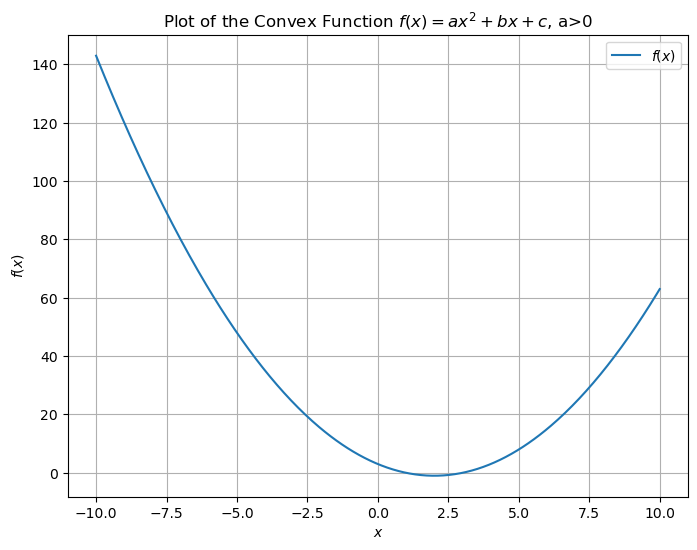

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function f(x) = ax^2 + bx + c
def f(x, a, b, c):
    return a*x**2 + b*x + c

# Coefficients
a, b, c = 1, -4, 3

# Generate x values
x = np.linspace(-10, 10, 400)

# Calculate y values
y = f(x, a, b, c)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x)$')
plt.title('Plot of the Convex Function $f(x) = ax^2 + bx + c$, a>0')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


### The Gradient Explained

In optimisation, we often deal with multivariable functions $f(x_1, x_2, ..., x_n)$, where each $x_i$ is an input parameter. These functions accept multiple inputs simultaneously but yield a single output. The goal of optimisation is to adjust these inputs to minimise or maximise the function’s output, which is crucial in minimising error or loss functions in machine learning.

#### Understanding the Gradient Through the Derivative

The derivative of a function at a point provides the rate of change of the function’s value with a small change in the input. For a single-variable function $f(x)$, the derivative at point $x$ is defined as:

$$
f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

This tells us how much $f(x)$ increases for a small increase in $x$. For multivariable functions, this concept extends to the **gradient** $\nabla f$, which we defined earlier as the vector of partial derivatives. Each component of $\nabla f$ indicates how $f$ changes with respect to a small change in one input parameter, holding the others constant.

#### Why Move Opposite to the Gradient?

The gradient $\nabla f$ points in the direction of the steepest increase of the function. Since we want to **minimise** $f(x)$, we move in the opposite direction:

$$
\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \nabla f(\mathbf{x}_i)
$$

where $\eta$ is the learning rate, controlling the step size.

But why exactly does the **negative sign** ensure minimisation? Let’s break it down with two cases:

**Case 1: The Function Increases with $x$**
- Suppose $f(x)$ increases as $x$ increases, meaning $f'(x) > 0$.  
- If we move in the **positive** direction, $f(x)$ would grow.
- To minimise $f(x)$, we must **decrease** $x$, which means subtracting $f'(x)$.

$$
x_{i+1} = x_i - \eta f'(x)
$$

- Since $f'(x) > 0$, the update moves $x$ in the **negative** direction.

**Case 2: The Function Decreases with $x$**
- Suppose $f(x)$ decreases as $x$ increases, meaning $f'(x) < 0$.  
- If we move in the **negative** direction, $f(x)$ would grow.
- To keep minimising $f(x)$, we must **increase** $x$.

$$
x_{i+1} = x_i - \eta f'(x)
$$

- Since $f'(x)$ is negative, subtracting it results in a **positive** step in $x$.

Thus, the negative sign ensures that we always move in the direction that decreases $f(x)$, no matter whether the function is increasing or decreasing at that point.


# Exercise: Multiple Local Minima 

The error function of a system with respect to its parameters has multiple local minima. You start from a random initial position in that error landscape (initializing the system's parameters with permitted values). What will happen? What will happen if you initialize again at a different random position? Consider the implications of starting at different positions on the likelihood of reaching global versus local minima.

## Solution

When you initialize the parameters of a system at a random position within an error landscape that contains multiple local minima, the gradient descent algorithm will begin to iteratively adjust the parameters to move towards the nearest minimum based on the starting point. Because the landscape has multiple local minima, the specific minimum it converges to depends on where the initialization occurred.

- **First Initialization**: In the first random initialization, the algorithm might converge to one of the local minima, which may or may not be the global minimum of the error function. The specific local minimum it reaches is determined by the initial parameters and the topology of the error landscape.

- **Second Initialization at a Different Random Position**: If you initialize the parameters at a different random position and run the gradient descent algorithm again, there's a chance that it might converge to a different local minimum than the first run. This highlights the sensitivity of the optimization process to initial conditions in landscapes with multiple local minima. It's possible, with multiple initializations, to explore different parts of the error landscape and potentially find a better (lower) local minimum, or with some luck, the global minimum.

This exercise illustrates the importance of initialization in optimization problems with complex landscapes. It also underlines why techniques such as multiple random initializations or more advanced optimization algorithms (like stochastic gradient descent, momentum, or adaptive learning rate methods) might be necessary to increase the likelihood of finding a better local minimum in such scenarios.


# Exercise: Multiple Local Minima (2)

Study the script and identify the function, its derivative, and the gradient descent rule. Run it a few times. What do you observe? If this function was the error function of your system, how would you make sure to achieve the lowest error?

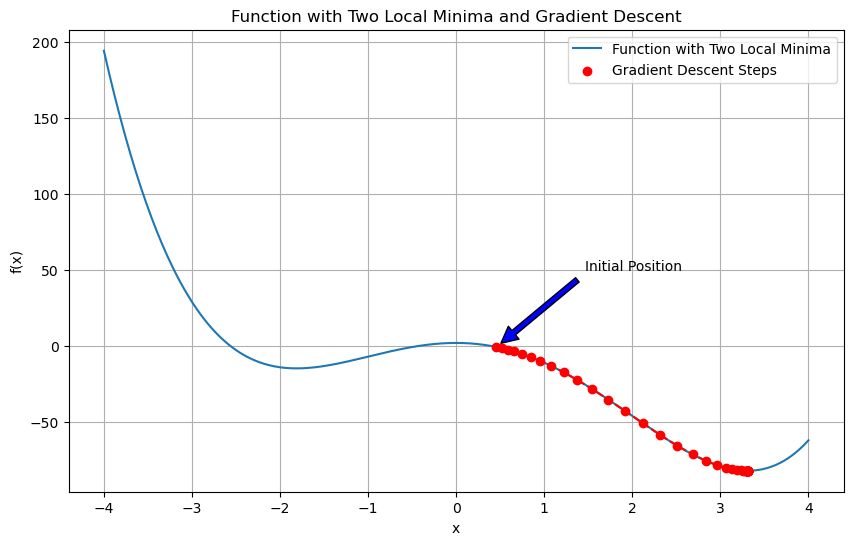

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function with two local minima and its derivative
def f(x):
    return x**4 - 2*x**3 - 12*x**2 + 2

def df(x):
    return 4*x**3 - 6*x**2 - 24*x

# Implement gradient descent
def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]
    for _ in range(num_iterations):
        grad = df(x)
        x -= learning_rate * grad
        history.append(x)
    return np.array(history), f(np.array(history))

# Randomize the starting point within a specific range to explore different minima
starting_point = np.random.uniform(-4, 4)
learning_rate = 0.005
num_iterations = 50

history, function_values = gradient_descent(starting_point, learning_rate, num_iterations)

# Plotting
x_values = np.linspace(-4, 4, 400)
y_values = f(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Function with Two Local Minima")
plt.scatter(history, function_values, color='red', zorder=5, label="Gradient Descent Steps")
plt.plot(history, function_values, color='red', linestyle='dashed', zorder=5)
# Add arrow for initial position
plt.annotate('Initial Position', xy=(history[0], function_values[0]), xytext=(history[0]+1, function_values[0]+50),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.title("Function with Two Local Minima and Gradient Descent")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


## Solution

The function defined in the script is $f(x) = x^4 - 2x^3 - 12x^2 + 2$, and its derivative, which is used to calculate the gradient, is $f'(x) = 4x^3 - 6x^2 - 24x$. The gradient descent rule applied in the script is $x_{\text{new}} = x - \eta \nabla f(x)$, where $\eta$ is the learning rate, and $\nabla f(x)$ is the gradient of the function at $x$.

When running the script multiple times with different random initial positions, you may observe that the gradient descent algorithm sometimes converges to one local minimum and sometimes to another. This behavior is because the function has two local minima, and the starting point significantly influences which minimum the algorithm will converge to.

If this function was the error function of your system and you aimed to achieve the lowest error, you could employ several strategies to increase the chances of finding the global minimum (the lowest error) rather than getting stuck in a local minimum:

1. **Multiple Initializations**: Run the gradient descent algorithm multiple times with different random initial positions. This strategy increases the likelihood of exploring different areas of the error landscape and potentially finding the global minimum.

2. **Adjusting the Learning Rate**: Experiment with different learning rates. A smaller learning rate can sometimes help make finer adjustments, which might lead to escaping shallow local minima, but it also makes the convergence process slower.

3. **Advanced Optimization Techniques**: Advanced optimization techniques are crucial in many areas of machine learning, including training neural networks. Two such techniques are Gradient Descent with Momentum and the Adam optimizer. These methods aim to improve upon the basic gradient descent algorithm by navigating complex error landscapes more effectively.

   - **Gradient Descent with Momentum** accelerates the convergence towards the optimal solution by incorporating the 'momentum' from previous steps. This can be particularly useful for overcoming the challenges posed by local minima. For an in-depth understanding, you might explore the paper: [On the importance of initialization and momentum in deep learning](http://proceedings.mlr.press/v28/sutskever13.html).

   - **Adam optimizer** adapts the learning rate for each parameter, combining ideas from other optimization algorithms to perform well on complex landscapes. The original paper on Adam, [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980), provides detailed insights.

By applying these strategies, you can enhance the odds of minimizing the error function to its lowest possible value, ensuring optimal performance for your system.


## Bandits and Expected Rewards

Consider a scenario with a bandit machine where pulling a lever results in collecting rewards. The machine is designed with known probabilities for distributing rewards. The expectation of the reward can be found using the definition of expectation, which for a discrete random variable $X$ taking values $x_i$ with probabilities $P(x_i)$, is given by:

$$ E[X] = \sum_{i} x_i P(x_i) $$

In the case of rewards:

$$ E[R] = \sum_{i} r_i P(R=r_i) $$

This expectation gives us a statistical measure of the average outcome we can expect over a long series of trials.


# Exercise: Bandit Expected Reward

Given two bandit machines with different reward distributions:

- Machine A offers a reward of £10 with a probability of 0.5, and a reward of £0 with a probability of 0.5.
- Machine B offers a reward of £15 with a probability of 0.3, and a reward of £0 with a probability of 0.7.

Calculate the expected rewards from each machine and determine which machine offers a better expected outcome.

## Solution

To calculate the expected rewards for each machine, we use the formula for expectation:

$$E[R] = \sum_{i} r_i P(R=r_i)$$

**For Machine A:**

The expected reward is calculated as:

$$E[R_A] = (£10 \times 0.5) + (£0 \times 0.5) = £5 + £0 = £5$$

**For Machine B:**

The expected reward is calculated as:

$$E[R_B] = (£15 \times 0.3) + (£0 \times 0.7) = £4.5 + £0 = £4.5$$

Comparing the expected rewards from both machines, Machine A offers a better expected outcome with £5 compared to Machine B's £4.5.


## Estimating Immediate Rewards

As a player without access to the design probabilities, you might observe someone playing the machine to estimate the average rewards without risking your own money. By noting down the rewards $r_1, r_2, \ldots, r_n$ over $n$ plays, you can estimate the average reward as:

$$Q = \frac{1}{n} \sum_{i=1}^{n} r_i$$

Here, we have transitioned from using expectation in the probabilistic sense to considering sample averages from statistics. This approach is meaningful in stationary environments, where probability distributions do not change over time. However, in non-stationary environments, it may be undesirable for the estimate of the reward to be permanently influenced by initial samples $r_1$, $r_2$. Consider, for example, an app whose first version received poor scores, but after the designer addressed the feedback and fixed the issues, it improved significantly. The past scores do not reflect the current quality of the app. Without partially forgetting past information, a very large number of new reviews would be needed to significantly alter the average feedback. 

For both stationary and non-stationary environments, we can frame the estimation $Q$ of the true expected reward as an optimisation problem. 

We can obtain $Q$ of the bandit machine based on the sample rewards $r_1, r_2, \ldots, r_n$, by minimising the error between $Q$ and the sum of observed rewards, leading to an error function:

$$\text{Error}_b = \frac{1}{2} \sum_i^n (r_i - Q)^2$$

This equation considers all available samples at once, as it requires a batch of collected samples for the calculation. 
That implies that all samples affect the estimate of $Q$ equally, which is the same as the stationary scenario for the specific batch. As an in-between step stationary and non-stationary environments, you could sample different matches (mini-batches), and optimise them separately, assuming a stationary environment for the duration of the batch only.

The derivative of this error function with respect to $Q$ will result in the following gradient rule:

$$\Delta Q = -\eta \frac{\partial \text{Error}_b}{\partial Q} = \eta \sum_{i=1}^{n} (r_i - Q)$$

where $\eta$ is the learning rate. The derived rule is a "batch" update rule, because the update is calculated taking into account the whole "batch".

If we prefer to update the variables on the go, assuming a non-stationary environment, we may derive an online rule via the error function:

$$\text{Error}_o = \frac{1}{2} (r - Q)^2$$ 
This error function suggests that we are finding the gradient considering the current reward each time. The two versions of the update rule (batch, online) approximate one another for very small learning rates. A small learning rate suggests that the $Q$ value does not change much from its previous value.


However, even in stationary environments, using the online approach (or a mini-batch approach) might be useful. Recalling the argument about the gradient and the derivative, it follows that calculations are only accurate with a small learning rate. Otherwise, your system will make a big step in the error landscape (i.e. the error function vs learnable parameters, here Q), which means it won't follow the gradient closely. In this particular scenario, this implies you could make an error in your estimate of Q values, potentially leading to more exploration. If the problem is challenging in the sense that the environment has a high degree of stochasticity, such an approach might help. Online learning is more noisy than batch learning, but of course, exploring a lot is more useful in the beginning and less when you think your agent may approach a good solution. Some simple heuristics can help to adjust the noise levels across time, gradually reducing exploration as the agent's estimates of Q values become more accurate.

# Exercise: Estimating Rewards from a Bandit Machine

1. **Derive the Online Update Rule**: Take the partial derivative of the error function with respect to the parameter $Q$ you wish to update, and write down the gradient update rule ($\Delta Q=$...).

2. **Calculate the Q estimate in a Stationary Environment**: In a stationary environment, show that the update rule is equivalent to averaging the rewards. A stationary environment can be formally defined as one in which the probability distribution of the rewards remains constant over time. Hint: one way to show this is by taking the batch error function, taking the gradient, and setting it equal to 0.

3. **Show the link between the Online Update Rule and the Leaky Integrator**:
We have seen previously that the leaky integrator differential equation in its discrete form is known as the exponential average. This is due to forgetting exponentially, something you can easily confirm by assuming $r(t)=0$. Replace both sides with an appropriate exponential function and show that they match each other. The leaky integrator model is given by: $\tau \frac{dQ}{dt} = -Q + r(t),$ where $Q$ is the estimated reward, $r(t)$ is the reward received at time $t$, and $\tau$ is a time constant. Discuss how the online update rule for the $Q$ values relates to the leaky integrator differential equation seen earlier. Hint: approximate the derivative by using its definition.


## Solution

### 1. Derive the Online Update Rule

Given the online error function:

$$\text{Error}_o = \frac{1}{2} (r_i - Q)^2$$

We take the partial derivative of the error function with respect to $Q$:

$$\frac{\partial \text{Error}_o}{\partial Q} = -(r_i - Q)$$

The gradient descent update with learning rate $\eta$ is:

$$\Delta Q = -\eta \frac{\partial \text{Error}_o}{\partial Q} = \eta (r_i - Q)$$

### 2. Calculate the Q estimate in a Stationary Environment

We will set the derivate of $\text{Error}_b$ with respect to Q to 0. We can do so because we are looking for a minumum, and the function $\text{Error}_b$ is convex.

$$0 = \frac{\partial \text{Error}_b}{\partial Q} = \sum_{i=1}^{n} (r_i - Q)$$

This leads to:

$$ \sum_{i=1}^{n} Q =  \sum_{i=1}^{n} r_i,$$ 

and since $\sum_{i=1}^{n} Q =n Q$ 

$$  Q = \frac{1}{n} \sum_{i=1}^{n} r_i$$

### 3. Show the link between the Online Update Rule and the Leaky Integrator

The leaky integrator model is given by:

$$\tau \frac{dQ}{dt} = - Q + r(t)$$

where $Q$ is the estimated reward, $r(t)$ is the reward received at time $t$, and $\tau$ is a rate constant. For $r(t)=0,$  $\tau \frac{dQ}{dt} = - Q $, which has solution $C e^{t/\tau}$ : $\tau C\frac{1}{\tau} e^{t/\tau} = C e^{t/\tau}$

We discritise the original equation by the definition of the derivative by we approximating the derivative with differences. Istead of $r(t)$ we now have $r_i$:

$$\tau\frac{\Delta Q}{\Delta t} = - Q + r_i.$$

Solving for $\Delta Q $ and setting $\eta= \frac{\Delta t}{\tau}$:

$$\Delta Q = \eta (r_i - Q).$$


## Multiple ARM Bandits

In reinforcement learning scenarios that focus on problems where rewards are immediate, i.e., provided directly after the action, the multi-armed bandit problem presents a common challenge. This setup involves multiple options (or "arms"), each with its distinct probability distribution of rewards. The primary challenge is determining which arm offers the highest reward, a task complicated by the stochastic (random) nature of rewards.

In this scenario, we can simply consider that we optimise as many error functions as arms independantly, but more elegantly we can consider a single error function with parameters the Q values of the arms, and calculate the update rule for the arms. 

$$\text{Error}_b = \frac{1}{2} \sum_a \sum_i (r_i - Q(a))^2 \mathbf{1}_{{A_i = a}},$$

where: 

$$ \mathbf{1}_{{A_i = a}} = 
\begin{cases} 
1 & \text{if } A_i = a \\
0 & \text{otherwise.}
\end{cases}
$$


Without loss of generality, lets assume we take the partial derivative of $\text{Error}_b$, with respect to $Q(1)$, that is $a=1$:

$$\frac{\partial \text{Error}_b}{\partial Q(1)} = \frac{\partial}{\partial Q(1)} \left( \frac{1}{2} \sum_a \sum_i (r_i - Q(a))^2 \mathbf{1}_{{A_i = a}} \right).$$

Applying the chain rule:

$$\frac{\partial \text{Error}_b}{\partial Q(1)} =  \sum_i - (r_i - Q(1)) \mathbf{1}_{{A_i = 1}}.$$

The $\sum_a $ drops because we are taking the partial derivative with respect to one of these actions $a=1$, hence the terms related to the other actions are considered constants. Then the update rule is given by:

$$\Delta Q(1) = - \eta \frac{\partial \text{Error}_b}{\partial Q(1)} = \eta \sum_i (r_i - Q(1)) \mathbf{1}_{{A_i = 1}},$$

and more generally for all arms:

$$\Delta Q(a) = - \eta \frac{\partial \text{Error}_b}{\partial Q(a)} = \eta \sum_i (r_i - Q(a)) \mathbf{1}_{{A_i = a}}.$$



# Exercise 

Starting from the "batch" error function show that at the minimum of the error function:

$$ Q_t(a) = \frac{\sum_{i} r_i \cdot \mathbf{1}_{{A_i = a}}}{\sum \mathbf{1}_{{A_i = a}}}$$

## Solution

We calculate:

$$\frac{\partial \text{Error}_b}{\partial Q(a)} = \frac{\partial}{\partial Q(a)} \left( \frac{1}{2} \sum_a \sum_i (r_i - Q(a))^2 \mathbf{1}_{{A_i = a}} \right).$$


Applying the chain rule:

$$\frac{\partial \text{Error}_b}{\partial Q(a)} =  \sum_i - (r_i - Q(a)) \mathbf{1}_{{A_i = a}}$$

The $\sum_a $ drops because we are taking the partial derivative with respect to one of these actions $a$, hence the terms related to the other actions are considered constants.

We the set the gradient to zero and solve for $Q(1)$:

$$0 =  \sum_i - (r_i - Q(a)) \mathbf{1}_{{A_i = a}}$$

Rearranging the terms gives us:

$$ \sum_i r_i \cdot \mathbf{1}_{{A_i = a}} = \sum_i Q(a) \cdot \mathbf{1}_{{A_i = a}}$$

Since $Q(a)$ is a constant with respect to the inner sum over $i$, it can be factored out:

$$ Q(a) \cdot \sum_i \mathbf{1}_{{A_i = a}} = \sum_i r_i \cdot \mathbf{1}_{{A_i = a}}$$

This leads us to the update rule for $Q(a)$ at the minimum of the error function:


$$Q(a) = \frac{\sum_{i} r_i \cdot \mathbf{1}_{{A_i = a}}}{\sum_i \mathbf{1}_{{A_i = a}}}$$

This formula implies that the updated estimate of $Q(a)$ for each arm $a$ is the average of the rewards received when that arm is selected, which is intuitive for a reinforcement learning scenario where we aim to maximize rewards by learning the best action to take based on past experiences.

## Polcies and the Exploration-Exploitation Dilemma 

Imagine you're navigating the diverse culinary landscape of a new city. After several dining experiences, you discover a restaurant that exceeds all expectations. Now, you face a classic decision: to explore further or to exploit this find. Exploring entails the risk of less satisfying meals, while exploiting ensures enjoyment but may preclude the discovery of superior options. This scenario illustrates the exploration-exploitation dilemma in reinforcement learning, where agents must balance the pursuit of known rewards against the potential of discovering greater rewards through exploration.

In reinforcement learning, the probability by which an agent chooses their actions is known as a **policy**. We will present fixed policies, and discuss their benefits and drawbacks:

- **Greedy Policy**: This policy always selects the action with the highest estimated reward based on current knowledge. It is formally expressed as:

  $$a_t = \underset{a}{\mathrm{argmax}}\ Q_t(a)$$

  Here, $\underset{a}{\mathrm{argmax}}\ Q_t(a)$ returns the action $a$ that maximizes the estimated reward $Q_t(a)$ at time $t$. While the greedy policy maximizes immediate rewards, it may overlook potentially higher rewards from less-explored actions.

- **Optimistic Greedy Policy**: An optimistic initialization encourages exploration by starting with a high initial estimate for all actions. The action selection mechanism is the same as the greedy policy, but the initial optimism motivates exploration early on. This can be represented by initializing $Q_t(a)$ to a value higher than any expected reward, promoting exploration of all actions before converging to exploitation.

- **Epsilon-Greedy Policy**: This policy introduces a probability $\epsilon$ to explore random actions, allowing the agent to intermittently diverge from the greedy choice. It can be mathematically described as:

  $$a_t = \begin{cases} 
  \text{a random action} & \text{with probability } \epsilon \\
  \underset{a}{\mathrm{argmax}}\ Q_t(a) & \text{with probability } 1 - \epsilon
  \end{cases}$$

  In this context, $\text{a random action}$ with probability $\epsilon$ allows for exploration, and $\underset{a}{\mathrm{argmax}}\ Q_t(a)$ with probability $1 - \epsilon$ chooses the action believed to offer the highest reward, thus balancing exploration and exploitation.

- **Softmax Policy**: Unlike the aforementioned policies that make decisions based on a deterministic or semi-random criterion, the Softmax policy selects actions based on a probability distribution over the estimated rewards. The probability of selecting action $a$ at time $t$ is given by:

  $$P(a) = \frac{e^{Q_t(a)/\tau}}{\sum_{b} e^{Q_t(b)/\tau}}$$

  where $\tau$ is a temperature parameter that modulates the degree of exploration: a high $\tau$ results in more exploratory behavior, while a low $\tau$ makes the policy behave more greedily. This policy elegantly balances exploration and exploitation by probabilistically favoring actions with higher expected rewards but still allowing for exploration.

These policies represent distinct approaches to navigating the exploration-exploitation trade-off. The **Greedy Policy** prioritizes known rewards, potentially at the cost of missing out on better options. The **Optimistic Greedy Policy** mitigates this by fostering initial exploration through optimistic value estimates. The **Epsilon-Greedy Policy** offers a compromise, allowing for controlled exploration while primarily focusing on exploiting known information. The **Softmax Policy** provides a probabilistic method for action selection, smoothly transitioning between exploration and exploitation based on the temperature parameter $\tau$.


##  The 10-Armed Bandit Problem

1. **Environment**: The environment is characterized by 10 actions $a \in \{1, 2, \ldots, 10\}$, each associated with a reward probability distribution. The true reward mean $q_*(a)$ for each action $a$ is unknown to the agent.

2. **Agent**: The agent interacts with the environment by selecting actions over a series of time steps. The agent's knowledge about the environment is encapsulated in its policy $\pi$.

3. **Policy ($\pi$)**: A policy $\pi$ is a mapping from states (or observed information) to actions. In the 10-armed bandit problem, since there's no explicit state beyond the bandit itself, the policy is a strategy for choosing an action based on the history of past actions and received rewards. The policy can be deterministic or stochastic.

### Algorithm Outline

1. **Initialization**:
   - Initialize the estimate of action-value $Q(a)$ for all $a$. 
   - Initialize the count $N(a)$ of times each action has been selected to 0.

2. **For each time step $t$**:
   - **Policy Decision**: Based on the current action-value estimates $Q(a)$, select an action $A_t$ using policy $\pi$. A common policy is the $\epsilon$-greedy policy, where with probability $1-\epsilon$ the agent chooses the action with the highest estimated value and with probability $\epsilon$ it randomly selects any action.
   - **Action and Reward**: Take action $A_t$, and observe reward $r_t$.
   - **Update Estimates**:
     - Update the count $N(A_t) = N(A_t) + 1$.
     - Update the estimated action-value $Q(A_t)$ using the observed reward $r_t$. A common update rule is:
       $$ Q(A_t) = Q(A_t) + \frac{1}{N(A_t)}(r_t - Q(A_t)) $$
       This is an instance of the incremental update rule for the sample-average method.

### Objective

The objective of the algorithm is to maximize the expected total reward over some time horizon $T$.

### Non-stationary environments

The algorithm above can be adjusted by modifying the update rule as $$ Q(A_t) = Q(A_t) + \eta(r_t - Q(A_t)). $$

# Exercise

We will explore bandits where rewards follow a binomial distribution, and where rare rewards are more valuable than common ones. Such conditions can lead agents to prematurely favor certain arms, being "trapped" in what is perceived as the best option based on incomplete information. Adjusting the policy becomes crucial to train an effective agent in these environments.

The provided code snippet (below) outlines a basic framework for a 10-arm bandit problem, in a stationary environment. Executing this code will reveal the expected rewards for each arm. Key (hyper-)parameters for exploration include the learning rate, which indicates the rate at which $Q$ estimates are updated; epsilon, determining the balance between exploration and exploitation for the Epsilon-Greedy; and the temperature parameter for the Softmax policy, which adjusts the degree of exploration based on the reward distribution. By hyper-parameters, we refer to parameters that do not directly change as a consequence of the algorithmic updates, but you can set them and they affect the learning; to distinguish them from the "learnable" parameters, those that are adapted by the algorithm, in our case, the $Q$ values.

Note the intentional gaps left for you to fill in, such as policy implementations and the simulation loop. The `np.random.choice` function will be instrumental in implementing the softmax policy.

After filling in the gaps, try different parameters to deepen your understanding of exploration/exploitation, noise, and learning rate, and confirm the concepts we discussed previously. A large part in such models is tuning, selecting the hyper-parameters appropriately to obtain good performance.

You could also enhance the policies, particularly the Epsilon-Greedy and Softmax strategies, as well as the learning rate scheme by heuristics. You could expand the implementation to also return cumulative average reward, so your graphs will be smoother, and you may need to average across fewer episodes, or remove the need for additional smoothing. We will not provide those in the solution and leave it to you to devise and implement.


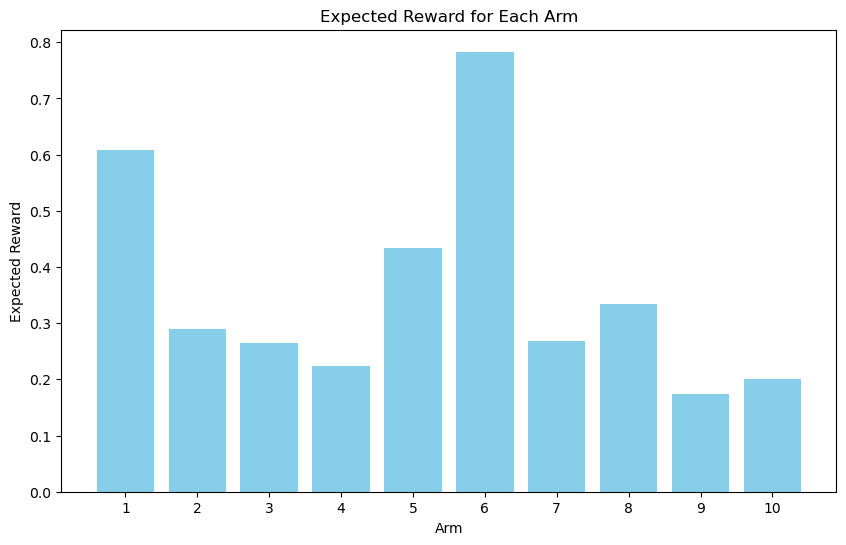

In [23]:
import numpy as np
import matplotlib.pyplot as plt

class BanditProblem:
    def __init__(self, k=10):
        self.k = k
        # Probabilities of getting a reward for each arm
        self.p_success = np.random.uniform(0.1, 0.9, self.k)
        # Assign reward magnitudes inversely related to their probability
        # Higher rewards for arms with lower success probabilities
        self.reward_magnitude = (1 / self.p_success -1)

    def get_reward(self, action):
        # Binary reward based on the arm's success probability
        success = np.random.rand() < self.p_success[action]
        return success * self.reward_magnitude[action]

    def return_expectations(self):
        # Expected rewards for each arm
        return self.p_success * self.reward_magnitude

    def return_arms(self):
        #Returns number of arms
        return self.k

    def plot_reward_frequency(self):
        plt.figure(figsize=(10, 6))
        
        # Calculate expected rewards for each arm
        reward_frequencies = self.p_success
        
        # Create a bar plot of expected rewards
        arms = np.arange(1, self.k + 1)  # Arm indices for x-axis
        plt.bar(arms, reward_frequencies, color='blue')
        
        plt.title('Reward Frequency for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Reward Frequency')
        plt.xticks(arms)  # Ensure a tick for each arm
        plt.savefig('binary_bandit2.png')  # Save the figure as a PNG file
        plt.show()

    def plot_true_reward_distributions(self):
        plt.figure(figsize=(10, 6))
        
        # Calculate expected rewards for each arm
        expected_rewards = self.return_expectations()
        
        # Create a bar plot of expected rewards
        arms = np.arange(1, self.k + 1)  # Arm indices for x-axis
        plt.bar(arms, expected_rewards, color='skyblue')
        
        plt.title('Expected Reward for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Expected Reward')
        plt.xticks(arms)  # Ensure a tick for each arm
        plt.savefig('binary_bandit.png')  # Save the figure as a PNG file
        plt.show()


class Policy:
    def __init__(self, number_of_actions, eta=None):
        self.number_of_actions = number_of_actions
        self.eta=eta
        self.reset()
        # Choose the update method based on whether eta is provided
        if self.eta is None:
            self.update = self.update_average
        else:
            self.update = self.update_eta

    def reset(self):
        self.Q = np.zeros(self.number_of_actions)  # Reset estimated rewards
        self.action_counts = np.zeros(self.number_of_actions)  # Reset counts of selections

    def update_average(self, action, reward):
        # TODO:implement stationary environment update rule
        pass
    
    def update_eta(self, action, reward):
        # TODO: implement online update rule
        pass

    def update_estimates(self, action, reward):
        # This method will now delegate to the correct update method chosen at initialization
        self.update(action, reward)

    def select_action(self):
        raise NotImplementedError("Subclasses should implement this method.")
         
        
class EpsilonGreedyPolicy(Policy):
    def __init__(self, number_of_actions, eta, epsilon):
        super().__init__(number_of_actions, eta)
        self.epsilon = epsilon

    def select_action(self):
         #TODO: implement policy
        pass

class SoftMaxPolicy(Policy):
    def __init__(self, number_of_actions, eta, tau):
        super().__init__(number_of_actions, eta)
        self.tau = tau

    def select_action(self):
        #TODO: implement policy
        pass


def simulate_bandit_policy(policy, bandit_problem, trials=100):
    reward_history = np.zeros(trials)
    policy.reset()  # Ensure the strategy is reset at the beginning of each simulation
    for trial in range(trials):
        #TODO: select action
        #TODO: get reward fromt bandit
        #TODO: update policy
        reward_history[trial] = reward
    return reward_history

def smooth_data(data, alpha=0.1):
    if len(data) == 0:  # Check for empty data
        return np.array([])  # Return an empty array if data is empty
    
    smoothed_data = np.zeros(len(data))  # Initialize smoothed_data with zeros
    smoothed_data[0] = data[0]  # First data point remains the same

    for i in range(1, len(data)):  # Start loop from the second element
        smoothed_data[i] = (1 - alpha) * smoothed_data[i - 1] + alpha * data[i]

    return smoothed_data

def simulate_and_average_policy(policy, bandit_problem, steps=100, runs=10):
   
    sum_of_rewards = np.zeros(steps)
    for _ in range(runs):
        rewards = simulate_bandit_policy(policy, bandit_problem, steps)
        sum_of_rewards += rewards
    return smooth_data(sum_of_rewards / runs, 0.01)


k = 10
trials = 10000
episodes = 100
epsilon = 0.12
tau=0.15
eta=None

# Initialize the bandit problem  
my_bandit = BanditProblem(k)

my_bandit.plot_true_reward_distributions()

# TODO: Intitialise policies

# TODO: Simulate and average across runs



# TODO: Plotting


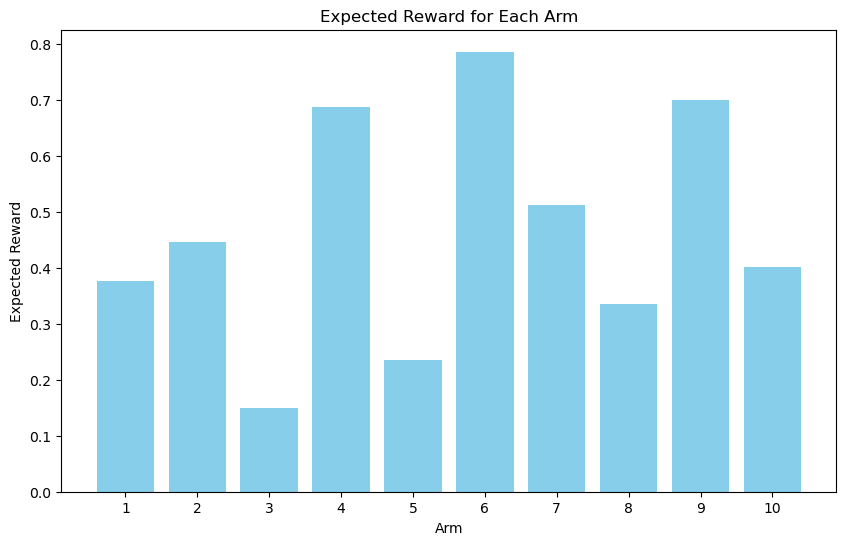

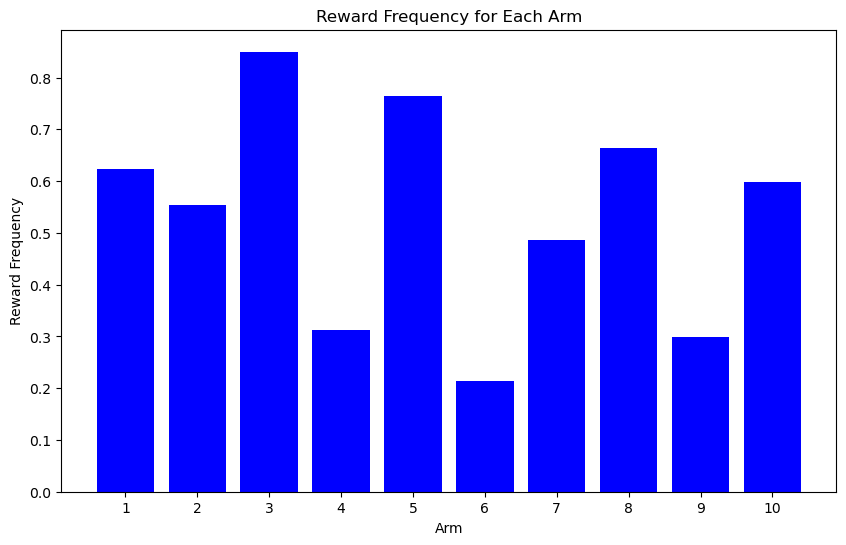

True mean rewards for each arm: 
 [0.37615532 0.44665554 0.14996959 0.68718514 0.23480863 0.78669253
 0.5134117  0.33544719 0.70104013 0.40207696]


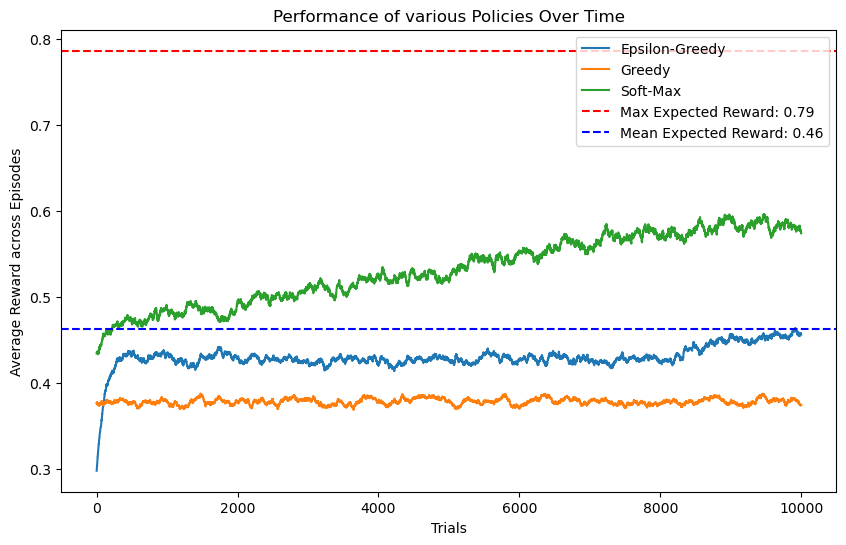

In [21]:
#Solution

import numpy as np
import matplotlib.pyplot as plt

class BanditProblem:
    def __init__(self, k=10):
        self.k = k
        # Probabilities of getting a reward for each arm
        self.p_success = np.random.uniform(0.1, 0.9, self.k)
        # Assign reward magnitudes inversely related to their probability
        # Higher rewards for arms with lower success probabilities
        self.reward_magnitude = (1 / self.p_success -1)

    def get_reward(self, action):
        # Binary reward based on the arm's success probability
        success = np.random.rand() < self.p_success[action]
        return success * self.reward_magnitude[action]

    def return_expectations(self):
        # Expected rewards for each arm
        return self.p_success * self.reward_magnitude

    def return_arms(self):
        #Returns number of arms
        return self.k

    def plot_reward_frequency(self):
        plt.figure(figsize=(10, 6))
        
        # Calculate expected rewards for each arm
        reward_frequencies = self.p_success
        
        # Create a bar plot of expected rewards
        arms = np.arange(1, self.k + 1)  # Arm indices for x-axis
        plt.bar(arms, reward_frequencies, color='blue')
        
        plt.title('Reward Frequency for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Reward Frequency')
        plt.xticks(arms)  # Ensure a tick for each arm
        plt.savefig('binary_bandit2.png')  # Save the figure as a PNG file
        plt.show()

    def plot_true_reward_distributions(self):
        plt.figure(figsize=(10, 6))
        
        # Calculate expected rewards for each arm
        expected_rewards = self.return_expectations()
        
        # Create a bar plot of expected rewards
        arms = np.arange(1, self.k + 1)  # Arm indices for x-axis
        plt.bar(arms, expected_rewards, color='skyblue')
        
        plt.title('Expected Reward for Each Arm')
        plt.xlabel('Arm')
        plt.ylabel('Expected Reward')
        plt.xticks(arms)  # Ensure a tick for each arm
        plt.savefig('binary_bandit.png')  # Save the figure as a PNG file
        plt.show()


class Policy:
    def __init__(self, number_of_actions, eta=None):
        self.number_of_actions = number_of_actions
        self.eta=eta
        self.reset()
        # Choose the update method based on whether eta is provided
        if self.eta is None:
            self.update = self.update_average
        else:
            self.update = self.update_eta

    def reset(self):
        self.Q = np.zeros(self.number_of_actions)  # Reset estimated rewards
        self.action_counts = np.zeros(self.number_of_actions)  # Reset counts of selections


    def update_average(self, action, reward):
        self.action_counts[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.action_counts[action] 
    
    def update_eta(self, action, reward):
        self.Q[action] += self.eta * (reward - self.Q[action])

    def update_estimates(self, action, reward):
        # This method will now delegate to the correct update method chosen at initialization
        self.update(action, reward)

    def select_action(self):
        raise NotImplementedError("Subclasses should implement this method.")


class EpsilonGreedyPolicy(Policy):
    def __init__(self, number_of_actions, eta, epsilon):
        super().__init__(number_of_actions, eta)
        self.epsilon = epsilon

    def select_action(self):
        if np.random.rand() < self.epsilon:  # Exploration
            return np.random.randint(0, self.number_of_actions)
        else:  # Exploitation
            max_q_value = np.max(self.Q)
            actions_with_max_q = np.where(self.Q == max_q_value)[0]
            return np.random.choice(actions_with_max_q)

class SoftMaxPolicy(Policy):
    def __init__(self, number_of_actions, eta, tau):
        super().__init__(number_of_actions, eta)
        self.tau = tau

    def select_action(self):
        exp_Q = np.exp(self.Q / self.tau)
        probabilities = exp_Q / np.sum(exp_Q)
        return np.random.choice(range(self.number_of_actions), p=probabilities)


def simulate_bandit_policy(policy, bandit_problem, trials=100):
    reward_history = np.zeros(trials)
    policy.reset()  # Ensure the strategy is reset at the beginning of each simulation
    for trial in range(trials):
        action = policy.select_action()
        reward = bandit_problem.get_reward(action)  # Fetch reward from the bandit problem
        policy.update_estimates(action, reward)  # Update strategy with the observed reward
        reward_history[trial] = reward
    return reward_history

def smooth_data(data, alpha=0.1):
    if len(data) == 0:  # Check for empty data
        return np.array([])  # Return an empty array if data is empty
    
    smoothed_data = np.zeros(len(data))  # Initialize smoothed_data with zeros
    smoothed_data[0] = data[0]  # First data point remains the same

    for i in range(1, len(data)):  # Start loop from the second element
        smoothed_data[i] = (1 - alpha) * smoothed_data[i - 1] + alpha * data[i]

    return smoothed_data

def simulate_and_average_policy(policy, bandit_problem, trials=100, episodes=10):
    sum_of_rewards = np.zeros(trials)
    for _ in range(episodes):
        rewards = simulate_bandit_policy(policy, bandit_problem, trials)
        sum_of_rewards += rewards
    return smooth_data(sum_of_rewards / episodes, 0.01)


k = 10
trials = 10000
episodes = 100
epsilon = 0.2
tau=0.3
eta=0.001

# Initialize the bandit problem and strategies
#np.random.seed(10) #for testing
my_bandit = BanditProblem(k)

my_bandit.plot_true_reward_distributions()
my_bandit.plot_reward_frequency()

epsilon_greedy = EpsilonGreedyPolicy(my_bandit.return_arms(), eta, epsilon)
greedy = EpsilonGreedyPolicy(my_bandit.return_arms(), eta, 0)
soft_max=SoftMaxPolicy(my_bandit.return_arms(), eta, tau)

# Simulate and average across runs

rewards_epsilon_greedy=simulate_and_average_policy(epsilon_greedy, my_bandit, trials, episodes)
rewards_greedy=simulate_and_average_policy(greedy, my_bandit, trials, episodes)
rewards_soft_max=simulate_and_average_policy(soft_max, my_bandit, trials, episodes)

# Display the true mean rewards for each arm
print("True mean rewards for each arm: \n", my_bandit.return_expectations())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rewards_epsilon_greedy, label="Epsilon-Greedy")
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_soft_max, label="Soft-Max")
max_expected_reward = np.max(my_bandit.return_expectations())
mean_expected_reward = np.mean(my_bandit.return_expectations())
plt.axhline(y=max_expected_reward, color='r', linestyle='--', label=f'Max Expected Reward: {max_expected_reward:.2f}')
plt.axhline(y=mean_expected_reward, color='b', linestyle='--', label=f'Mean Expected Reward: {mean_expected_reward:.2f}')
plt.xlabel('Trials')
plt.ylabel('Average Reward across Episodes')
plt.title('Performance of various Policies Over Time')
plt.legend()
plt.savefig('binary_bandit_performance.png')  # Save the figure as a PNG file
plt.show()